In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

# Dealing with missing values

## Numpy

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
print(x.dtype, x.sum())

int64 15


In [ ]:
x = np.array([1, 2, 3, '--', 5])

In [ ]:
print(x.dtype)

<U21


In [ ]:
x = np.array([1, 2, 3, None, 5])

In [ ]:
#x.sum()

In [ ]:
x = np.array([1, 2, 3, np.nan, 5])

In [ ]:
x.sum()

nan

In [ ]:
x_b = [True, True, True, False, True]

In [ ]:
x[x_b]

array([1., 2., 3., 5.])

In [ ]:
m_x = np.ma.masked_array(x, mask = [0, 0, 0, 1, 0])

In [ ]:
m_x

masked_array(data=[1.0, 2.0, 3.0, --, 5.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20)

In [ ]:
m_x.sum()

11.0

## Pandas


In [ ]:
df = pd.read_csv("rooms.csv")

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1,Mechanical,Y
1,102.0,NaN,Empty,N
2,103.0,3,Electrical,Y
3,104.0,2,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1,Electrical,Y
6,107.0,3,Civil,--
7,108.0,NaN,CS,Y
8,109.0,na,Mechanical,NaN
9,110.0,2,CS,N


In [ ]:
df.dtypes

Room_Number     float64
Num_Students     object
Department       object
Occupied         object
dtype: object

In [ ]:
df['Num_Students'].isnull()

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7     True
8    False
9    False
Name: Num_Students, dtype: bool

In [ ]:
df['Num_Students'].isnull().sum()

3

In [ ]:
df.isnull()

,Room_Number,Num_Students,Department,Occupied
0,False,False,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,True,False,False,False
6,False,False,False,False
7,False,True,False,False
8,False,False,False,True
9,False,False,False,False


In [ ]:
df.isnull().sum()

Room_Number     1
Num_Students    3
Department      0
Occupied        1
dtype: int64

In [ ]:
missing_values = ['NA', 'n/a', 'na', '--', 'Empty']

In [ ]:
df = pd.read_csv("rooms.csv", na_values = missing_values)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,NaN
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,NaN
9,110.0,2.0,CS,N


In [ ]:
df.isnull().sum()

Room_Number     1
Num_Students    4
Department      1
Occupied        2
dtype: int64

In [ ]:
df.dtypes

Room_Number     float64
Num_Students    float64
Department       object
Occupied         object
dtype: object

In [ ]:
df['Num_Students'].mean()

2.0

In [ ]:
df['Occupied'].fillna("N", inplace = True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,Y
1,102.0,NaN,NaN,N
2,103.0,3.0,Electrical,Y
3,104.0,2.0,Mechanical,Y
4,105.0,NaN,Chemical,N
5,NaN,1.0,Electrical,Y
6,107.0,3.0,Civil,N
7,108.0,NaN,CS,Y
8,109.0,NaN,Mechanical,N
9,110.0,2.0,CS,N


In [ ]:
def convert_TF(v):
    if v == 'Y':
        return True
    return False

In [ ]:
df.Occupied = df.Occupied.apply(convert_TF)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,NaN,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,False
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,NaN,CS,True
8,109.0,NaN,Mechanical,False
9,110.0,2.0,CS,False


In [ ]:
df.Department.fillna(method = "ffill", inplace = True)
# ffill is forward fill (takes previous value if NAN)
# bfill is backward fill (takes next value if NAN)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,NaN,Mechanical,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,NaN,Chemical,False
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,NaN,CS,True
8,109.0,NaN,Mechanical,False
9,110.0,2.0,CS,False


In [ ]:
df.Num_Students.fillna(df.Num_Students.median(), inplace = True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,2.0,Mechanical,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,2.0,Chemical,False
5,NaN,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,2.0,CS,True
8,109.0,2.0,Mechanical,False
9,110.0,2.0,CS,False


In [ ]:
df.Room_Number.interpolate(inplace = True)

In [ ]:
df

,Room_Number,Num_Students,Department,Occupied
0,101.0,1.0,Mechanical,True
1,102.0,2.0,Mechanical,False
2,103.0,3.0,Electrical,True
3,104.0,2.0,Mechanical,True
4,105.0,2.0,Chemical,False
5,106.0,1.0,Electrical,True
6,107.0,3.0,Civil,False
7,108.0,2.0,CS,True
8,109.0,2.0,Mechanical,False
9,110.0,2.0,CS,False


# Open-Ended DS Problem

## Ameo 2015 Data

In [ ]:
df = pd.read_excel("ameo_2015.xlsx")

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [ ]:
df.shape

(3998, 38)

In [ ]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [ ]:
df.isnull().sum().sum()

0

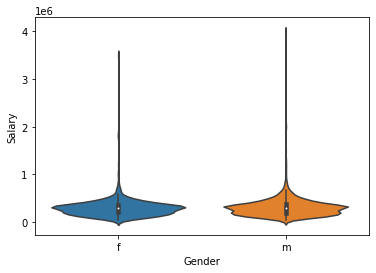

In [ ]:
sns.violinplot('Gender', 'Salary', data = df);

In [ ]:
df[['Gender', '10percentage', '12percentage', 'collegeGPA']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [ ]:
df[['Gender', '10percentage', '12percentage', 'collegeGPA']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [ ]:
df[['Gender', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [ ]:
df[['Salary', 'Gender']].groupby('Gender').mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [ ]:
th = df.Salary.mean() + df.Salary.std()

In [ ]:
df['HighIncome'] = (df.Salary > th)

In [ ]:
df.sample(5)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighIncome
3741,806319,400000,2014-01-01,present,software developer,Noida,m,1989-03-16,65.40,cbse,2008,60.4,cbse,11759,2,MCA,computer application,78.00,11759,0,Uttarakhand,2014,685,570,705,0.960903,595,-1,-1,-1,-1,-1,-1,0.2718,0.0459,0.7785,-0.6147,-1.8189,False
2438,1088206,335000,2013-09-01,present,programmer analyst,Pune,m,1990-06-21,77.00,state board,2008,75.0,state board,13424,2,B.Tech/B.E.,electronics & telecommunications,62.00,13424,0,Maharashtra,2013,675,630,485,0.207392,405,260,-1,-1,-1,-1,-1,1.7081,0.5454,0.9322,-0.4879,0.8637,False
3845,282011,550000,2011-07-01,2014-11-01 00:00:00,engineering technician,sambalpur,f,1990-06-25,70.30,up board,2007,63.2,up board,4450,2,B.Tech/B.E.,mechanical engineering,66.60,4450,0,Uttar Pradesh,2011,375,435,485,0.840841,-1,-1,-1,473,-1,-1,-1,-0.2628,0.8128,1.3977,1.0024,0.3444,True
147,611620,615000,2013-06-01,present,quality engineer,Noida,m,1993-08-15,80.00,state board,2009,77.2,cbse,64,2,B.Tech/B.E.,information technology,76.76,64,0,Uttar Pradesh,2013,475,630,810,0.974396,615,-1,-1,-1,-1,-1,-1,-1.8825,-0.7866,0.3174,1.0333,-1.8189,True
1126,278742,180000,2012-12-01,2013-03-01 00:00:00,application developer,Bangalore,m,1990-01-05,70.33,up,2006,77.2,up,568,2,B.Tech/B.E.,computer engineering,71.14,568,0,Uttar Pradesh,2011,435,525,534,0.930371,565,-1,-1,-1,-1,-1,-1,0.8578,0.3448,1.2525,-1.5828,-0.4455,False


In [ ]:
df[['HighIncome', 'Gender', 'Salary']].groupby(['HighIncome', 'Gender']).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [ ]:
df[['HighIncome', 'Gender', 'Salary']].groupby(['HighIncome', 'Gender']).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [ ]:
print("Low income female percentage ", 917/(917 + 2809) * 100)
print("Low income male percentage ", 2809/(917 + 2809) * 100)

Low income female percentage  24.610842726784757
Low income male percentage  75.38915727321525


In [ ]:
print("High income female percentage ", 40/(40 + 232) * 100)
print("High income male percentage ", 232/(40 + 232) * 100)

High income female percentage  14.705882352941178
High income male percentage  85.29411764705883


In [ ]:
df.CollegeTier.unique()

array([2, 1])

In [ ]:
df[['CollegeTier', 'HighIncome', 'Salary']].groupby(['HighIncome', 'CollegeTier']).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [ ]:
print("High Income college tier 2 percentage ", 209/(209 + 63) * 100)

High Income college tier 2 percentage  76.83823529411765


In [ ]:
print("Low Income college tier 2 percentage ", 3492/(3492 + 234) * 100)

Low Income college tier 2 percentage  93.71980676328504


In [ ]:
df[['Gender', 'CollegeTier', 'Salary']].groupby(['CollegeTier', 'Gender']).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [ ]:
print("Tier 1 college female percentage ", 51/(51 + 246) * 100)

Tier 1 college female percentage  17.17171717171717


In [ ]:
print("Tier 2 college female percentage ", 906/(906 + 2795) * 100)

Tier 2 college female percentage  24.479870305322883


## Agriculture Data

In [ ]:
!pip3 install plotly_express

In [ ]:
df = pd.read_csv("apy.csv", na_values = ['='])

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
df.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [ ]:
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242364 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242364 non-null  object 
 1   District_Name  242364 non-null  object 
 2   Crop_Year      242364 non-null  int64  
 3   Season         242364 non-null  object 
 4   Crop           242364 non-null  object 
 5   Area           242364 non-null  float64
 6   Production     242364 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


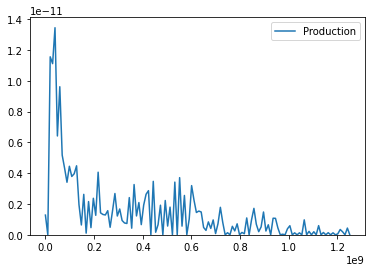

In [ ]:
sns.kdeplot(df.Production);

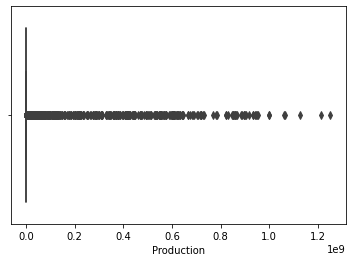

In [ ]:
sns.boxplot(df.Production);

In [ ]:
df[df.State_Name == "Karnataka"]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
76865,Karnataka,BAGALKOT,1998,Kharif,Arhar/Tur,6154.0,2602.0
76866,Karnataka,BAGALKOT,1998,Kharif,Bajra,48855.0,52375.0
76867,Karnataka,BAGALKOT,1998,Kharif,Castor seed,71.0,61.0
76868,Karnataka,BAGALKOT,1998,Kharif,Cotton(lint),15225.0,22129.0
76869,Karnataka,BAGALKOT,1998,Kharif,Groundnut,16368.0,7734.0
...,...,...,...,...,...,...,...
97981,Karnataka,YADGIR,2014,Summer,Onion,7.0,34.0
97982,Karnataka,YADGIR,2014,Summer,Rice,15205.0,35029.0
97983,Karnataka,YADGIR,2014,Summer,Sunflower,14.0,5.0
97984,Karnataka,YADGIR,2014,Whole Year,Coconut,168.0,1499.0


In [ ]:
df.groupby(['State_Name', 'Crop', 'Crop_Year']).sum()

Area  Production
State_Name                  Crop     Crop_Year                       
Andaman and Nicobar Islands Arecanut 2000         4354.00     7200.00
                                     2001         4354.00     7300.00
                                     2002         4363.00     7350.00
                                     2003         4379.00     6707.00
                                     2004         4425.37     4781.05
...                                                   ...         ...
West Bengal                 Wheat    2010       316808.00   874415.00
                                     2011       315659.00   872895.00
                                     2012       321572.00   895927.00
                                     2013       331481.00   927837.00
                                     2014       334640.00   939254.00

[12896 rows x 2 columns]

In [ ]:
df[df.State_Name == "West Bengal"]['Crop'].unique()

array(['Rice', 'Jute', 'Mesta', 'Urad', 'Gram', 'Khesari', 'Masoor',
       'Moong(Green Gram)', 'Oilseeds total', 'Wheat', 'Arecanut',
       'Arhar/Tur', 'Coconut ', 'Dry chillies', 'Groundnut', 'Linseed',
       'Maize', 'Potato', 'Pulses total', 'Rapeseed &Mustard', 'Sesamum',
       'Sugarcane', 'Turmeric', 'Dry ginger', 'Sunflower',
       'Peas & beans (Pulses)', 'Cotton(lint)', 'Safflower', 'Garlic',
       'Barley', 'Bajra', 'Horse-gram', 'Other Kharif pulses', 'Soyabean',
       'Jowar', 'Niger seed', 'Sannhamp', 'Small millets', 'Tobacco',
       'Ragi', 'Other  Rabi pulses', 'Cardamom', 'Castor seed', 'Moth'],
      dtype=object)

In [ ]:
df.groupby(['State_Name', 'Crop_Year']).sum()

Area   Production
State_Name                  Crop_Year                         
Andaman and Nicobar Islands 2000         44518.00  89060914.00
                            2001         41163.00  89718700.00
                            2002         45231.40  94387137.67
                            2003         44799.40  95296454.67
                            2004         45308.77  87186497.63
...                                           ...          ...
West Bengal                 2010       7246875.00  38308645.00
                            2011       7755360.00  36777774.00
                            2012       7850936.00  38918275.00
                            2013       7999815.00  37901281.00
                            2014       8058390.00  43584403.00

[519 rows x 2 columns]

In [ ]:
df_ = df.groupby(['State_Name', 'Crop_Year']).sum()

In [ ]:
df_.reset_index(inplace = True)

In [ ]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,44518.00,89060914.00
1,Andaman and Nicobar Islands,2001,41163.00,89718700.00
2,Andaman and Nicobar Islands,2002,45231.40,94387137.67
3,Andaman and Nicobar Islands,2003,44799.40,95296454.67
4,Andaman and Nicobar Islands,2004,45308.77,87186497.63


In [ ]:
df_[['State_Name', 'Crop_Year']].groupby('State_Name').count()

,Crop_Year
State_Name,
Andaman and Nicobar Islands,8
Andhra Pradesh,18
Arunachal Pradesh,18
Assam,18
Bihar,18
Chandigarh,13
Chhattisgarh,15
Dadra and Nagar Haveli,17
Goa,12


In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


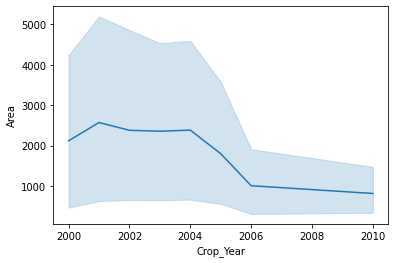

In [ ]:
sns.lineplot(x = "Crop_Year", y = "Area", data = df[df.State_Name == "Andaman and Nicobar Islands"]);

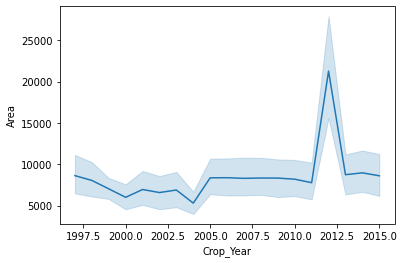

In [ ]:
sns.lineplot(x = "Crop_Year", y = "Area", data = df[df.State_Name == "Odisha"]);

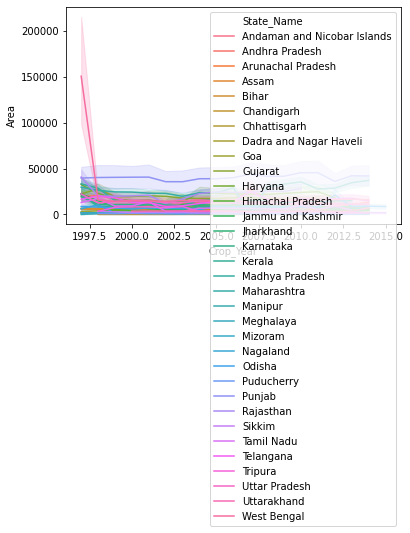

In [ ]:
sns.lineplot(x = "Crop_Year", y = "Area", data = df, hue = "State_Name");

In [ ]:
import plotly_express as px

In [ ]:
px.scatter(df_, x = 'Area', y = 'Production', animation_frame = 'Crop_Year', animation_group = 'State_Name', 
           color = 'State_Name')

In [ ]:
df_.sort_values('Crop_Year', inplace = True)

In [ ]:
px.scatter(df_, x = 'Area', y = 'Production', animation_frame = 'Crop_Year', animation_group = 'State_Name', 
           color = 'State_Name')

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [271]:
df[(df.State_Name == "Kerala") & (df.Crop_Year == 2000)].sort_values("Production")

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
99868,Kerala,KOTTAYAM,2000,Kharif,Sesamum,6.0,1.0
100437,Kerala,MALAPPURAM,2000,Kharif,Ragi,4.0,3.0
99567,Kerala,KOLLAM,2000,Summer,Rice,4.0,4.0
98946,Kerala,KANNUR,2000,Kharif,Sesamum,10.0,6.0
98604,Kerala,IDUKKI,2000,Kharif,Ragi,8.0,7.0
...,...,...,...,...,...,...,...
101702,Kerala,THRISSUR,2000,Whole Year,Coconut,89472.0,540000000.0
98953,Kerala,KANNUR,2000,Whole Year,Coconut,96975.0,621000000.0
100445,Kerala,MALAPPURAM,2000,Whole Year,Coconut,110378.0,626000000.0
101425,Kerala,THIRUVANANTHAPURAM,2000,Whole Year,Coconut,88663.0,635000000.0


In [272]:
df[df.Crop.isin(['Rice', 'Wheat', 'Maize', 'Ragi'])]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.00,3663.00
246085,West Bengal,PURULIA,2014,Summer,Maize,325.00,2039.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00


In [275]:
df_ = df[df.Crop.isin(['Rice', 'Wheat', 'Maize', 'Ragi'])].groupby(['State_Name', 'Crop_Year']).sum()

In [276]:
df_.head()

Area  Production
State_Name                  Crop_Year                      
Andaman and Nicobar Islands 2000       10881.00    32184.00
                            2001        9801.00    27333.00
                            2002       10885.00    32111.66
                            2003       10561.37    30850.87
                            2004       10734.92    29192.23

In [278]:
df_.reset_index(inplace = True)

In [279]:
df_.head()

,State_Name,Crop_Year,Area,Production
0,Andaman and Nicobar Islands,2000,10881.00,32184.00
1,Andaman and Nicobar Islands,2001,9801.00,27333.00
2,Andaman and Nicobar Islands,2002,10885.00,32111.66
3,Andaman and Nicobar Islands,2003,10561.37,30850.87
4,Andaman and Nicobar Islands,2004,10734.92,29192.23


In [280]:
df_.sort_values('Crop_Year', inplace = True)

In [281]:
px.scatter(df_, x = 'Area', y = 'Production', animation_frame = 'Crop_Year', animation_group = 'State_Name', 
           color = 'State_Name')

In [286]:
df_['Efficiency'] = df_['Production']/df_['Area']

In [287]:
px.scatter(df_, x = 'Area', y = 'Efficiency', size = 'Production', animation_frame = 'Crop_Year', animation_group = 'State_Name', 
           color = 'State_Name')

In [288]:
px.scatter(df_, x = 'Area', y = 'Efficiency', size = 'Production', animation_frame = 'Crop_Year', animation_group = 'State_Name', 
           color = 'State_Name', range_y = [0.75, 5], range_x = [-1E6, 20E6])